In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt 
from scipy.stats import gaussian_kde
sns.set(style="ticks",)
sns.set_context("notebook", font_scale=1.3, rc={"lines.linewidth": 2.5})
%matplotlib inline

## Load Data

In [39]:
df = pd.read_csv('../assets/results/decision_point_results.csv')
df = df[df.columns[:12]]
df.head()

,Unnamed: 0,uid,sub_uid,building,pl_base_iou,pl_seg_gt_iou,pl_seg_infer_iou,height,range_noise,lidar_beams,found_hole,hole_remaining
0,0,0,0,Building2_Example3,0.899871,0.899871,0.896415,5,0.01,64,True,0.0
1,1,0,1,Building2_Example3,0.903799,0.904198,0.904198,5,0.01,64,True,0.0
2,2,0,2,Building2_Example3,0.904973,0.904973,0.904973,5,0.01,64,True,0.0
3,3,0,3,Building2_Example3,0.902045,0.904581,0.904581,5,0.01,64,True,0.0
4,4,0,4,Building2_Example3,0.900098,0.901773,0.901773,5,0.01,64,True,0.0


In [8]:
# test = df[df['range_noise'] == 0.09]
# test[~test['found_hole']]

## Visualize Breaks

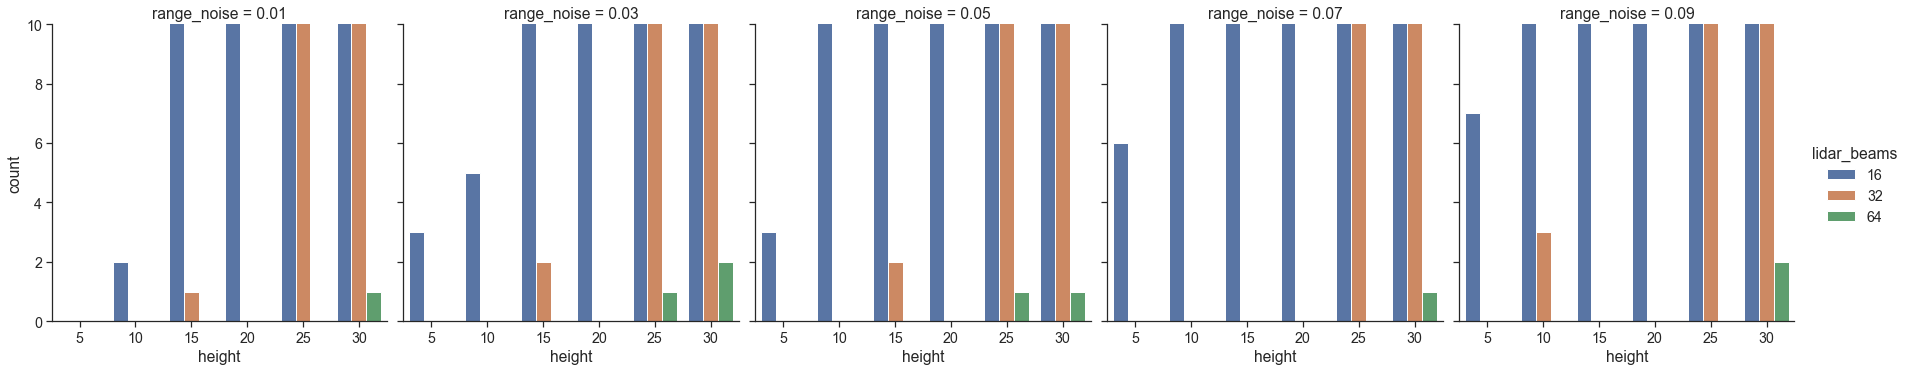

In [52]:
def visualize_break(df, break_point=0.1):
    df['found_hole'] = df['hole_remaining'] <= break_point
    df['missed_hole'] = ~df['found_hole']
    
    
    df_simple = df[df['missed_hole']]
    g = sns.catplot(x="height", col="range_noise", kind='count', hue='lidar_beams', data=df_simple)
    g.set(ylim=(0, 10))
    
visualize_break(df)

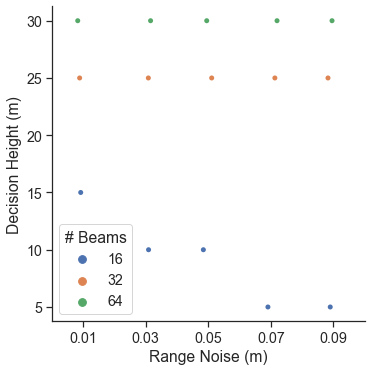

In [53]:
data_decision = [
    dict(lidar_beams=16, range_noise=0.01, height=15),
    dict(lidar_beams=16, range_noise=0.03, height=10),
    dict(lidar_beams=16, range_noise=0.05, height=10),
    dict(lidar_beams=16, range_noise=0.07, height=5),
    dict(lidar_beams=16, range_noise=0.09, height=5),
    dict(lidar_beams=32, range_noise=0.01, height=25),
    dict(lidar_beams=32, range_noise=0.03, height=25),
    dict(lidar_beams=32, range_noise=0.05, height=25),
    dict(lidar_beams=32, range_noise=0.07, height=25),
    dict(lidar_beams=32, range_noise=0.09, height=25),
    dict(lidar_beams=64, range_noise=0.01, height=30),
    dict(lidar_beams=64, range_noise=0.03, height=30),
    dict(lidar_beams=64, range_noise=0.05, height=30),
    dict(lidar_beams=64, range_noise=0.07, height=30),
    dict(lidar_beams=64, range_noise=0.09, height=30),
]
df_decision = pd.DataFrame.from_records(data_decision)
df_decision = df_decision.rename(columns={"lidar_beams": "# Beams", "height": "Decision Height (m)", "range_noise": "Range Noise (m)"})
g = sns.catplot(data=df_decision, y='Decision Height (m)', x='Range Noise (m)', hue='# Beams', legend_out=False)
g.savefig('../assets/imgs/decision_point.pdf')

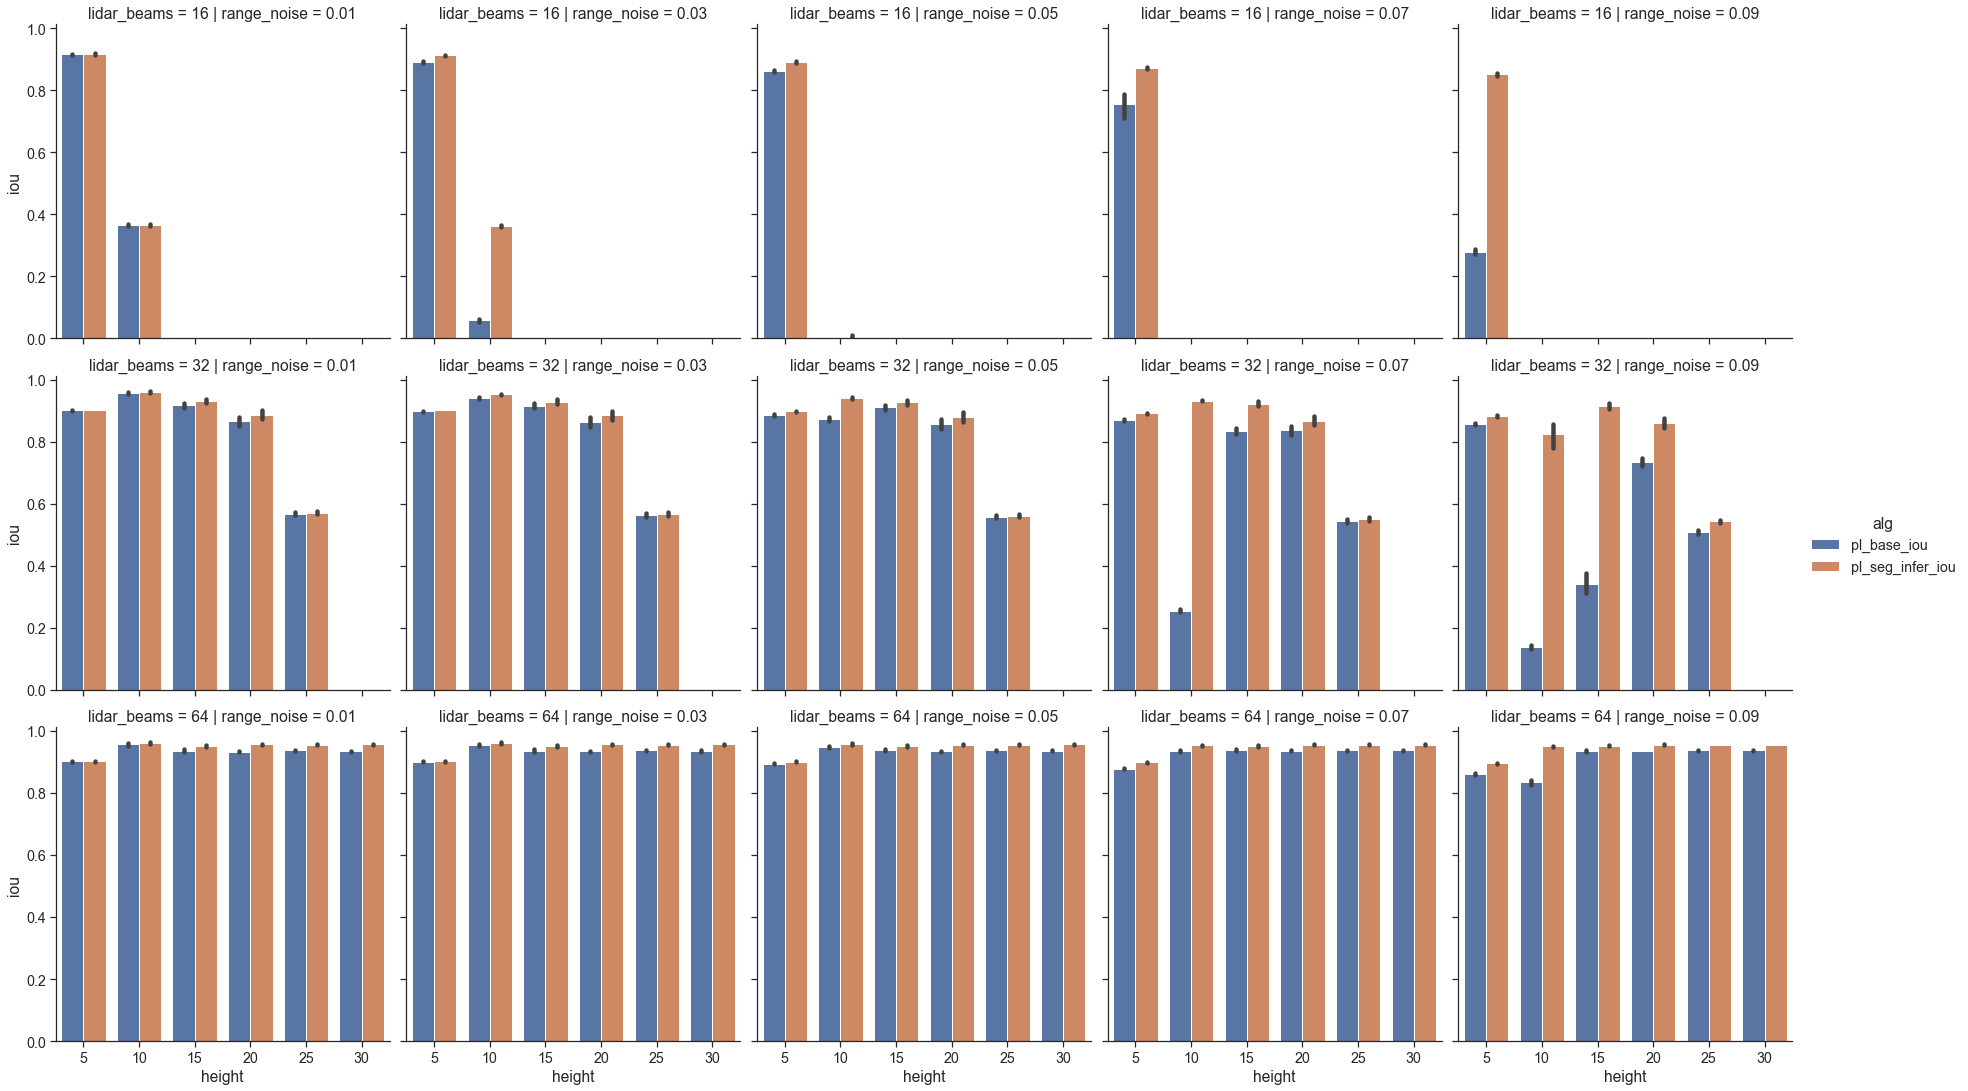

In [54]:
def visualize_iou(df, break_point=0.1):
    
    df_simple = df.melt(id_vars=["uid", "sub_uid", "range_noise", "lidar_beams", "height"],
                                    value_vars=['pl_base_iou', 'pl_seg_infer_iou'],
                                    var_name="alg", 
                                    value_name="iou")
#     return df_simple
    g = sns.catplot(x="height", y='iou', col="range_noise", row='lidar_beams', hue='alg', data=df_simple, kind='bar')
    
    
visualize_iou(df)